In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Activation
from tensorflow.keras.utils import to_categorical

In [ ]:
import tensorflow.keras.backend as K

In [ ]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import pickle
import random

In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from datetime import datetime
from packaging import version

In [ ]:
dirtrain='/content/drive/MyDrive/Programs/Datasets/train'

In [ ]:
dirtest='/content/drive/MyDrive/Programs/Datasets/test'

In [ ]:
categories=["Black_rot","Esca_(Black_Measles)","Healthy","Leaf_blight_(Isariopsis_Leaf_Spot)"]

(256, 256, 3)


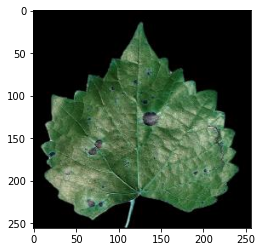

In [ ]:
for c in categories:
    path=os.path.join(dirtrain,c)
    for i in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,i))
        print(img_array.shape)
        plt.imshow(img_array)
        plt.show()
        break
    break

In [ ]:
training_data = []
def create_training_data():
    count=[]
    for c in categories:
        path=os.path.join(dirtrain,c)
        class_num=categories.index(c)
        c=0
        for i in os.listdir(path):
            c=c+1
            try:
                img_array=cv2.imread(os.path.join(path,i))
                #img_array=cv2.resize(img_array,(128,128))
                training_data.append([img_array,class_num])
            except Exception as e:
                pass
        count.append(c)
    return count
count_train=create_training_data()

In [ ]:
testing_data = []
def create_testing_data():
    count=[]
    for c in categories:
        path=os.path.join(dirtest,c)
        class_num=categories.index(c)
        c=0
        for i in os.listdir(path):
            c=c+1
            try:
                img_array=cv2.imread(os.path.join(path,i))
                #img_array=cv2.resize(img_array,(128,128))
                testing_data.append([img_array,class_num])
            except Exception as e:
                pass
        count.append(c)
    return count
count_test=create_testing_data()

In [ ]:
print(len(training_data))
print(count_train)
print(len(testing_data))
print(count_test)

3209
[966, 1154, 213, 876]
890
[210, 240, 230, 210]


In [ ]:
random.shuffle(training_data)
random.shuffle(testing_data)

In [ ]:
x_train = []
y_train = []
x_test = []
y_test = []

In [ ]:
for features, label in training_data:
    x_train.append(features)
    y_train.append(label)
'''for features,label in testing_data:
    x_train.append(features)
    y_train.append(label)'''
x_train=np.array(x_train).reshape(-1,256,256,3)

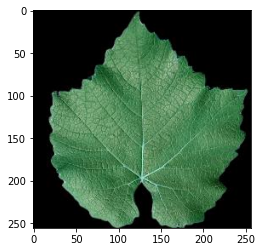

In [ ]:
x=cv2.resize(training_data[0][0],(256,256))
plt.imshow(x,cmap='gray')

In [ ]:
for features, label in testing_data:
    x_test.append(features)
    y_test.append(label)
x_test=np.array(x_test).reshape(-1,256,256,3)

In [ ]:
def save_training_data(x_train,y_train):
    pickle_out=open("x_train_coloured.pickle","wb")
    pickle.dump(x_train,pickle_out)
    pickle_out.close()

    pickle_out=open("y_train_coloured.pickle","wb")
    pickle.dump(y_train,pickle_out)
    pickle_out.close
save_training_data(x_train,y_train)

In [ ]:
def save_testing_data(x_test,y_test):
    pickle_out=open("x_test_coloured.pickle","wb")
    pickle.dump(x_test,pickle_out)
    pickle_out.close()

    pickle_out=open("y_test_coloured.pickle","wb")
    pickle.dump(y_test,pickle_out)
    pickle_out.close()
save_testing_data(x_test,y_test)

In [ ]:
def load_data():
    pickle_in=open("x_train_coloured.pickle","rb")
    x_train=pickle.load(pickle_in)
    return x_train

In [ ]:
x_train.shape

(3209, 256, 256, 3)

In [ ]:
K.clear_session()
model=Sequential()
model.add(layers.Conv2D(32,(3,3),padding='same',input_shape=(256,256,3),activation='relu'))
model.add(layers.Conv2D(32,(3,3),activation='relu'))


model.add(layers.MaxPool2D(pool_size=(8,8)))

model.add(layers.Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(layers.Conv2D(32,(3,3),activation='relu'))

model.add(layers.MaxPool2D(pool_size=(8,8)))

model.add(Activation('relu'))

model.add(Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(4,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 31, 31, 32)        9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                    

In [ ]:
y_train_cat=to_categorical(y_train,4)


In [ ]:
y_test_cat=to_categorical(y_test,4)

In [ ]:
model.fit(x_train,y_train_cat,batch_size=32,
          epochs=10,verbose=1,validation_split=0.15,shuffle=True)

Epoch 1/10
86/86 [==============================] - 401s 5s/step - loss: 3.6375 - accuracy: 0.4811 - val_loss: 0.7425 - val_accuracy: 0.6660
Epoch 2/10
86/86 [==============================] - 400s 5s/step - loss: 0.6380 - accuracy: 0.7338 - val_loss: 0.3709 - val_accuracy: 0.8610
Epoch 3/10
86/86 [==============================] - 399s 5s/step - loss: 0.3432 - accuracy: 0.8695 - val_loss: 0.4424 - val_accuracy: 0.8651
Epoch 4/10
86/86 [==============================] - 401s 5s/step - loss: 0.2465 - accuracy: 0.9182 - val_loss: 0.3833 - val_accuracy: 0.8797
Epoch 5/10
86/86 [==============================] - 400s 5s/step - loss: 0.1724 - accuracy: 0.9366 - val_loss: 0.7110 - val_accuracy: 0.7988
Epoch 6/10
86/86 [==============================] - 399s 5s/step - loss: 0.1583 - accuracy: 0.9457 - val_loss: 0.3211 - val_accuracy: 0.9025
Epoch 7/10
86/86 [==============================] - 399s 5s/step - loss: 0.1360 - accuracy: 0.9619 - val_loss: 0.3343 - val_accuracy: 0.8983
Epoch 8/10
86

In [ ]:
model.save("leaf_disease_coloured.h5")

In [ ]:
new_model=tf.keras.models.load_model("leaf_disease_coloured.h5")

In [ ]:
loss, acc = new_model.evaluate(x_test,y_test_cat, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

28/28 - 46s - loss: 0.5856 - accuracy: 0.8640 - 46s/epoch - 2s/step
Restored model, accuracy: 86.40%


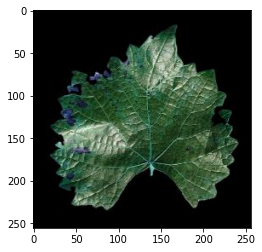

In [ ]:
d='/content/drive/MyDrive/Programs/Datasets/test/Esca_(Black_Measles)/00c247e8-48d2-4a56-a9f3-4eacfb4d85be___FAM_B.Msls 4197_final_masked.jpg'
img=cv2.imread(d)
plt.imshow(img)

In [ ]:
img=img.reshape(-1,256,256,3)

In [ ]:
predict_x=model.predict(img) 
classes_x=np.argmax(predict_x,axis=1)

In [ ]:
print(classes_x)

[1]


In [ ]:
categories[classes_x[0]]

'Esca_(Black_Measles)'

Grapevine:
1. Dataset: /content/drive/MyDrive/Programs/Datasets
2. Diseases: Black_rot,Esca_(Black_Measles),Healthy,Leaf_blight(Isariopsis_Leaf_Spot)
3. Model: 4 Layer CNN
4. Training Data: 3209
5. Testing Data: 890
6. Epoch: 10
7. Batch Size: 32
8. Validation Split: 0.15
9. Accuracy: 86.40%
SMOTE - Visual daat
Training acuracy ?
VGG16 - Transfer Learning 
Exception architecture